In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from scipy.stats import f_oneway, ttest_ind, chi2_contingency
from mpl_toolkits.mplot3d import Axes3D

cars_df = pd.read_csv('/content/drive/MyDrive/5502/car_data_set.csv')

In [2]:
cars_df.shape

(11914, 16)

In [3]:
cars_df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
print(cars_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [5]:
print(cars_df.dtypes)

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object


In [6]:
cars_df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [7]:
def check_missing_values(df):
    null_values = df.isnull().sum()
    print("Null Values:")
    print(null_values)

    nan_values = df.isna().sum()
    print("\nNaN Values:")
    print(nan_values)

    empty_values = (df == '').sum()
    print("\nEmpty Values:")
    print(empty_values)


def preprocess_data(df, numeric_columns, categorical_columns):
    for col in numeric_columns:
        col_mean = df[col].mean()
        df[col].fillna(col_mean, inplace=True)

    for col in categorical_columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

    return df


check_missing_values(cars_df)

numeric_cols = ['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']
categorical_cols = ['Engine Fuel Type', 'Market Category']

cars_df = preprocess_data(cars_df, numeric_cols, categorical_cols)

check_missing_values(cars_df)


Null Values:
Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

NaN Values:
Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

Empty Values:
Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP

<h1>CORRELATION HEATMAP </H1>

<ipython-input-8-17d755946109>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cars_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


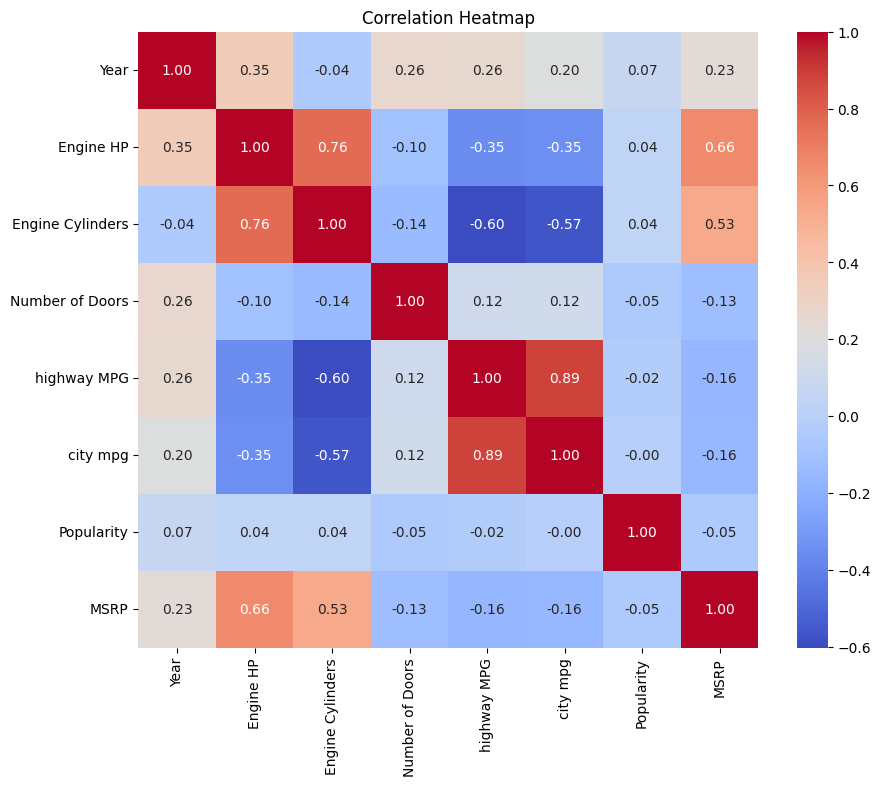

In [8]:

plt.figure(figsize=(10, 8))
sns.heatmap(cars_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

<H1> Numerical vs Numerical </H1>


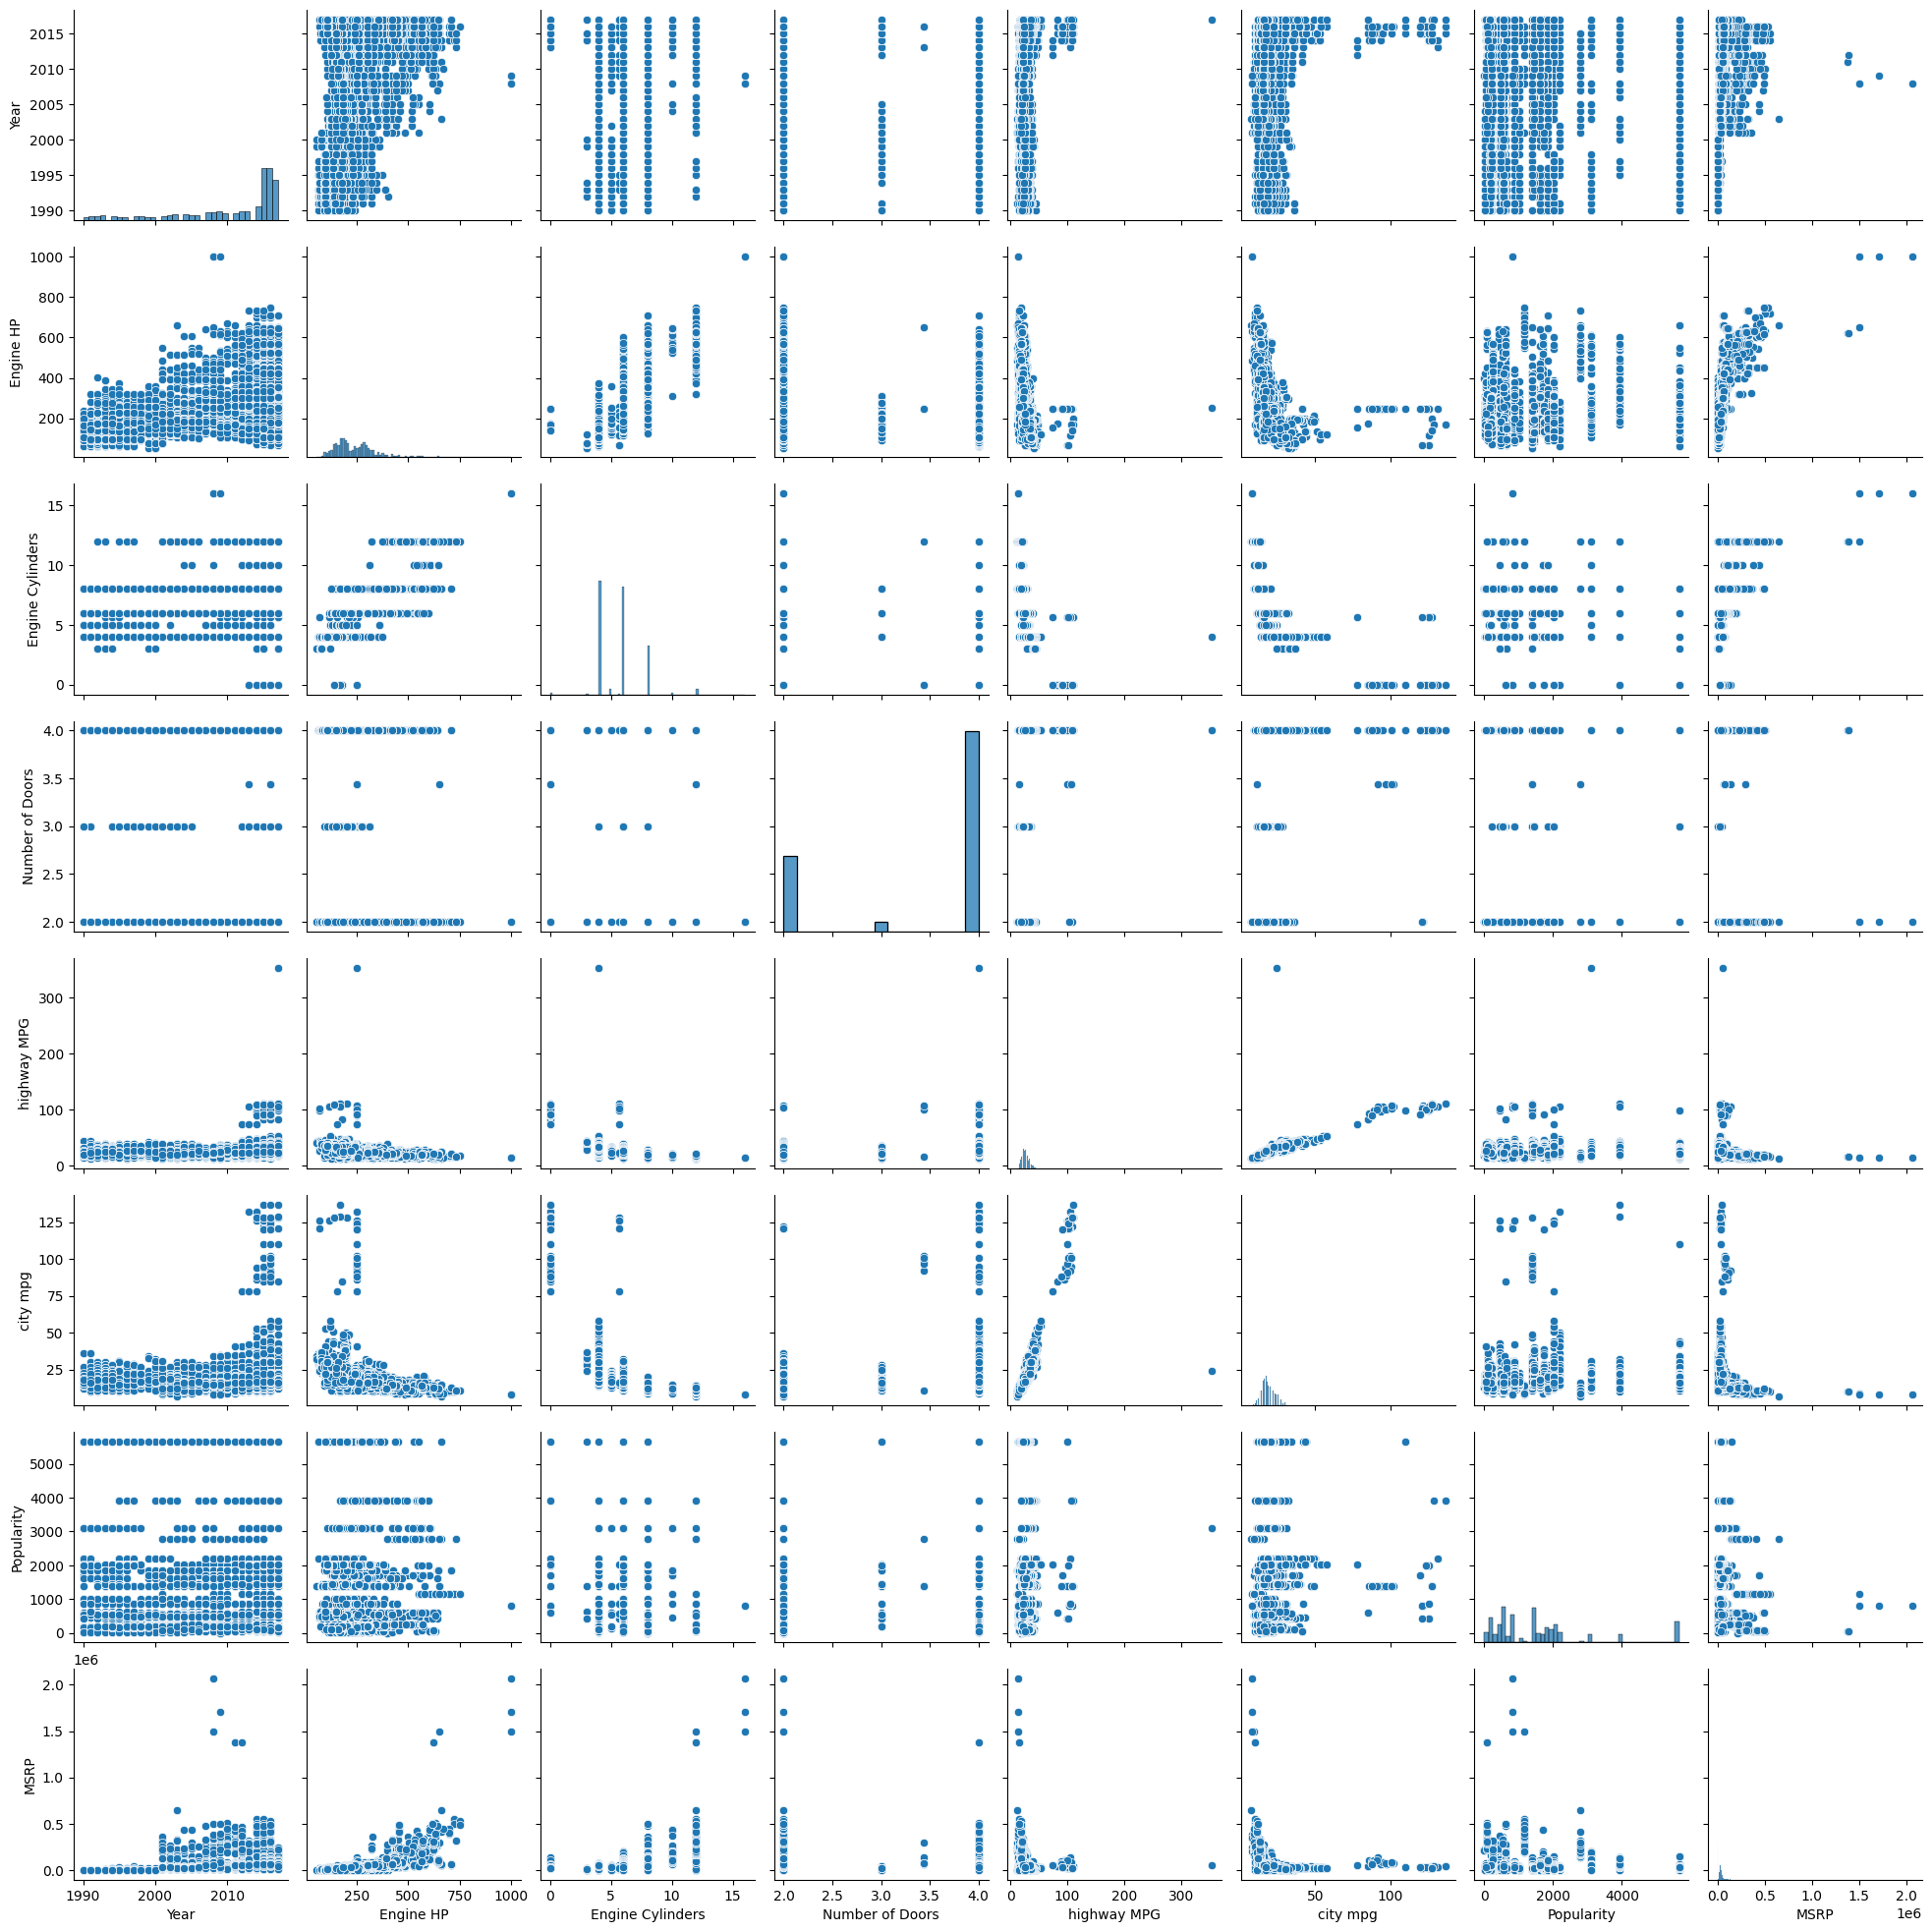

In [9]:
sns.pairplot(cars_df)
plt.show()

<H1>Numerical vs Categorical:</H1>
<H5>Boxplot: Engine Fuel Type vs MSRP</H5>




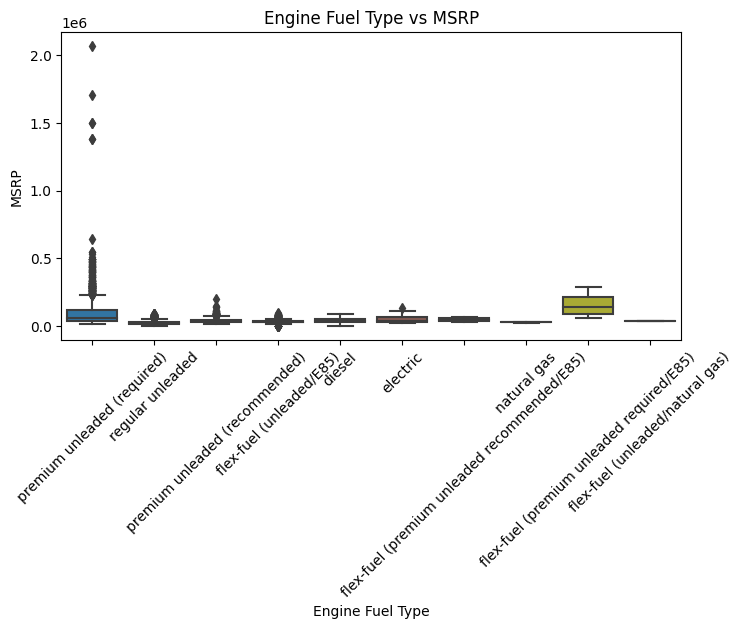

In [10]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Engine Fuel Type', y='MSRP', data=cars_df)
plt.title('Engine Fuel Type vs MSRP')
plt.xticks(rotation=45)
plt.show()


<H1>Numerical vs Categorical:</H1>
<H5> Barplot: Transmission Type vs MSRP</H5>




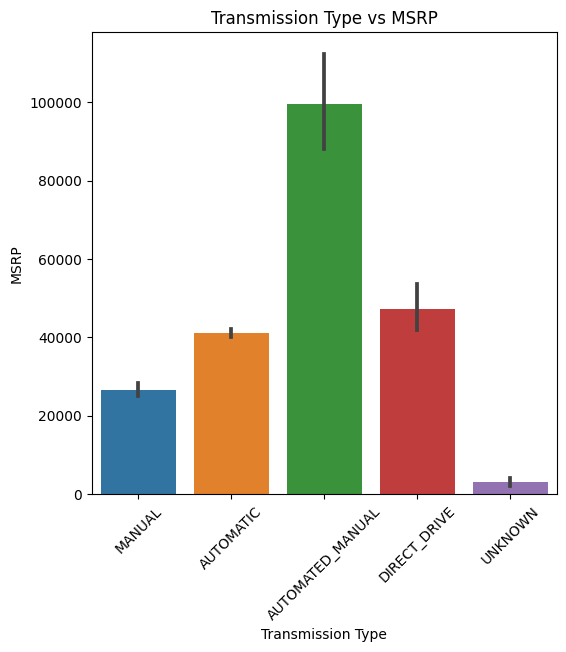

In [11]:

plt.figure(figsize=(6, 6))
sns.barplot(x='Transmission Type', y='MSRP', data=cars_df)
plt.title('Transmission Type vs MSRP')
plt.xticks(rotation=45)
plt.show()



<H1>Categorical vs Categorical:</H1>
<H5>Countplot: Vehicle Style by Drivetrain</H5>




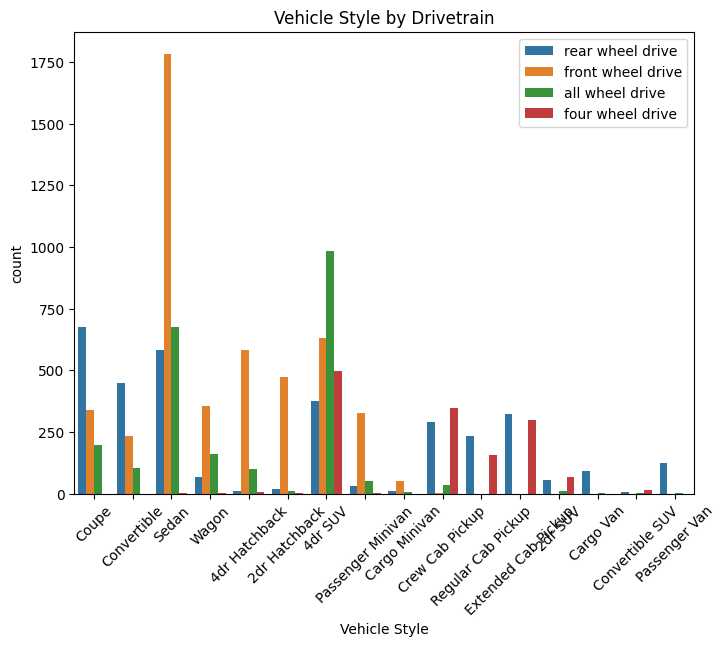

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Vehicle Style', hue='Driven_Wheels', data=cars_df)
plt.title('Vehicle Style by Drivetrain')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()



<H1>Numerical and Categorical vs Categorical:</H1>
<H5>Barplot: Engine Cylinders & Vehicle Size by Market Category</H5>




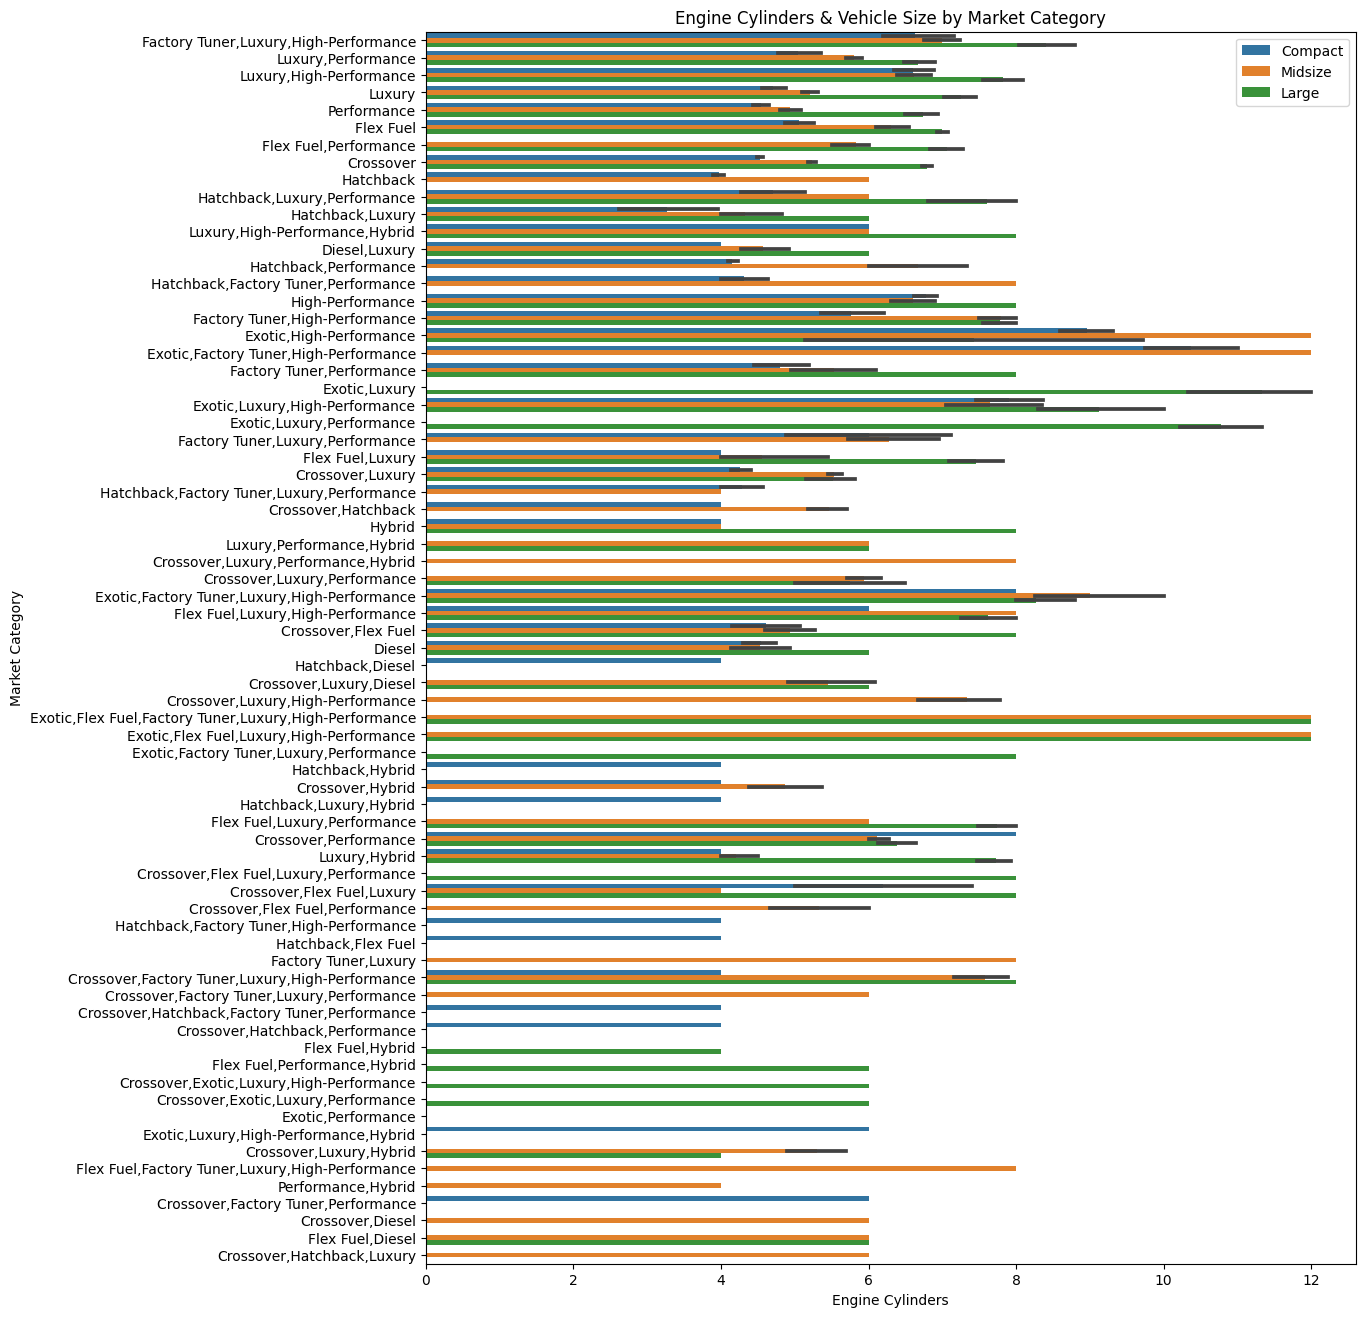

In [13]:
plt.figure(figsize=(12, 16))
sns.barplot(x='Engine Cylinders', y='Market Category', hue='Vehicle Size', data=cars_df)
plt.title('Engine Cylinders & Vehicle Size by Market Category')
plt.legend(loc='upper right')
plt.show()



<H1>Two Numerical vs One Categorical:</H1>
<H5>Scatterplot: Engine HP, Highway MPG by Vehicle Style</H5>




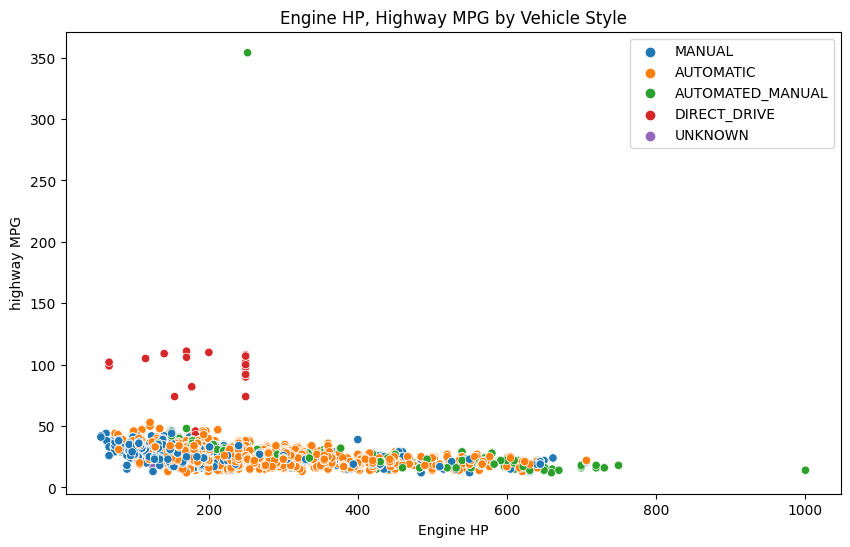

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine HP', y='highway MPG', hue='Transmission Type', data=cars_df)
plt.title('Engine HP, Highway MPG by Vehicle Style')
plt.legend(loc='upper right')
plt.show()



<H1>Three Numerical Variables:</H1>
<H5>3D Scatterplot: Engine HP, Highway MPG, City MPG</H5>




In [15]:
Q1 = cars_df.quantile(0.25)
Q3 = cars_df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((cars_df < (Q1 - 1.5 * IQR)) | (cars_df > (Q3 + 1.5 * IQR))).sum()
print("Potential Outliers (using IQR method):")
print(outliers)


Potential Outliers (using IQR method):
Driven_Wheels          0
Engine Cylinders     357
Engine Fuel Type       0
Engine HP            509
MSRP                 996
Make                   0
Market Category        0
Model                  0
Number of Doors        0
Popularity           881
Transmission Type      0
Vehicle Size           0
Vehicle Style          0
Year                 661
city mpg             316
highway MPG          192
dtype: int64


<ipython-input-15-73b63a5a9663>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = cars_df.quantile(0.25)
<ipython-input-15-73b63a5a9663>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = cars_df.quantile(0.75)
<ipython-input-15-73b63a5a9663>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((cars_df < (Q1 - 1.5 * IQR)) | (cars_df > (Q3 + 1.5 * IQR))).sum()


T-TEST

In [16]:

premium_unleaded = cars_df[cars_df['Engine Fuel Type'] == 'premium unleaded (required)']
regular_unleaded = cars_df[cars_df['Engine Fuel Type'] == 'regular unleaded']

t_stat, p_value = stats.ttest_ind(premium_unleaded['MSRP'], regular_unleaded['MSRP'])
print(f"T-test results - t-statistic: {t_stat}, p-value: {p_value}")

alpha = 0.05  #significance level

if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in MSRP based on engine type.")
else:
    print("Fail to reject null hypothesis: No significant difference in MSRP based on engine type.")


T-test results - t-statistic: 53.05815695600708, p-value: 0.0
Reject null hypothesis: There is a significant difference in MSRP based on engine type.


<h1>Correlation Analysis</h1>

In [17]:
correlation_matrix = cars_df[['Engine HP', 'MSRP']].corr(method='pearson')
print("Correlation between Engine HP and MSRP:")
print(correlation_matrix)


Correlation between Engine HP and MSRP:
           Engine HP      MSRP
Engine HP   1.000000  0.661644
MSRP        0.661644  1.000000


<h1>ANOVA TEST</h1>

In [18]:

grouped_data = cars_df.groupby('Vehicle Style')['MSRP'].apply(list)
f_statistic, p_value = f_oneway(*grouped_data)
print("\nANOVA Test - MSRP variation among Vehicle Styles:")
print(f"F-Statistic: {f_statistic}, p-value: {p_value}")



ANOVA Test - MSRP variation among Vehicle Styles:
F-Statistic: 92.55549649004786, p-value: 5.613983147064976e-271


<h1>T - TEST</h1>

In [19]:

engine_fuel_types = cars_df['Engine Fuel Type'].unique()

for fuel_type in engine_fuel_types:
    subset = cars_df[cars_df['Engine Fuel Type'] == fuel_type]['MSRP']
    t_stat, p_value = ttest_ind(subset, cars_df['MSRP'])
    print(f"\nT-test for {fuel_type} Engine Fuel Type and MSRP:")
    print(f"T-statistic: {t_stat}, p-value: {p_value}")



T-test for premium unleaded (required) Engine Fuel Type and MSRP:
T-statistic: 34.910868116537976, p-value: 4.7306254324863656e-256

T-test for regular unleaded Engine Fuel Type and MSRP:
T-statistic: -24.345905204481735, p-value: 5.905242990090284e-129

T-test for premium unleaded (recommended) Engine Fuel Type and MSRP:
T-statistic: 0.14094797183948202, p-value: 0.8879131574803788

T-test for flex-fuel (unleaded/E85) Engine Fuel Type and MSRP:
T-statistic: -2.1588670958355616, p-value: 0.030878987504420384

T-test for diesel Engine Fuel Type and MSRP:
T-statistic: 0.039873987036859695, p-value: 0.9681942496423356

T-test for electric Engine Fuel Type and MSRP:
T-statistic: 0.9926277529140373, p-value: 0.3209114461704788

T-test for flex-fuel (premium unleaded recommended/E85) Engine Fuel Type and MSRP:
T-statistic: 0.6825686452754542, p-value: 0.4948926966706487

T-test for natural gas Engine Fuel Type and MSRP:
T-statistic: -0.2947803041303683, p-value: 0.7681668493734748

T-test f

<h1>Chi-square Test:</h1>

In [20]:

cross_tab = pd.crosstab(cars_df['Vehicle Style'], cars_df['Market Category'])
chi2, p, dof, expected = chi2_contingency(cross_tab)
print("\nChi-square Test - Association between Vehicle Style and Market Category:")
print(f"Chi-square value: {chi2}, p-value: {p}")



Chi-square Test - Association between Vehicle Style and Market Category:
Chi-square value: 27100.05046976974, p-value: 0.0


In [21]:

X = cars_df['Engine HP']  # Independent variable
y = cars_df['MSRP']  # Dependent variable

X = sm.add_constant(X)  # Add a constant term for intercept
model = sm.OLS(y, X).fit()  # Fit the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MSRP   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     9275.
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:54:11   Log-Likelihood:            -1.4458e+05
No. Observations:               11914   AIC:                         2.892e+05
Df Residuals:                   11912   BIC:                         2.892e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -5.05e+04   1032.111    -48.932      0.0